<a href="https://colab.research.google.com/github/AVData/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2/Agustin_Vargas_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [226]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

sales

[3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [228]:
# Mean Formula

def mean(lst):
  return round(float((sum(lst))/len(lst)), 4)      
  # Take the sum of the lst, devide by len(lst) and make it into a float,
  # otherwise it can't be used with .extend() method as a NoneType

print(mean(sales))
type(mean(sales)) 

3052.7143


float

In [229]:
# Variance formula

# The formula for Variance needs to have the difference between each list
# element and the mean, then squared, and all devided by N - 1

def sample_variance(lst):
  variance = []        # we create an empty listto add our var-vals
  for i in lst:        # run a For loop on th lst to obrtain sqrd-diff-vals
    diff = [((i - mean(lst))**2)]
    variance.extend(diff) # use .extend() to add sqrd-diff-vals to var-list
  return round(float(sum(variance)/(len(lst)-1)), 4) # print results rounded to 4 dec places

print(sample_variance(sales))
type(sample_variance(sales))

214387.9048


float

In [248]:
# Standard Deviation of Sample formula for a list

def standard_dev(lst):
  sample_variance(lst)
  # print('Standard Deviation:', round(((sample_variance(lst))**(1/2)), 4))
  return round((sample_variance(lst))**(1/2), 4)

print(standard_dev(sales))
type(standard_dev(sales))

463.0204


float

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [233]:
num_cust_last_wk = [127, 80, 105, 92, 120, 115, 93]
num_cust_last_wk

[127, 80, 105, 92, 120, 115, 93]

In [0]:
import pandas as pd

In [255]:
sales_cust = {"Sales": sales, "Customers": num_cust_last_wk}

sales_cust_df = pd.DataFrame(sales_cust)
sales_cust_df

,Sales,Customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [261]:
print("Covariance between last week's sales\nand nubmer of customers this week")
round(sales_cust_df.cov(), 2)

Covariance between last week's sales
and nubmer of customers this week


,Sales,Customers
Sales,214387.90,7604.36
Customers,7604.36,290.95


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [249]:
# Finding the standard dev for customers

std_dev_cust = standard_dev(num_cust_last_wk)
std_dev_cust

17.0573

In [260]:
std_dev_sales = standard_dev(sales)
std_dev_sales

463.0204

In [263]:
r = round(((7604.36)/(std_dev_sales*std_dev_cust)), 4)
r

0.9628

In [264]:
round(sales_cust_df.corr(), 4)

,Sales,Customers
Sales,1.0000,0.9628
Customers,0.9628,1.0000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
import pandas as pd

In [0]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [0]:
titanic_df.head()

In [20]:
titanic_df.describe(exclude='number')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1310,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,917,39,64


In [47]:
titanic_df_num = titanic_df.drop(columns=['Unnamed: 0', 'name', 'sex', 'ticket', 
                                          'cabin', 'embarked', 
                                          'boat', 'home.dest'], index=0)
titanic_df_num.head(3)

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
1,1.0,1.0,0.9167,1.0,2.0,151.55,NaN,1
2,1.0,0.0,2.0000,1.0,2.0,151.55,NaN,1
3,1.0,0.0,30.0000,1.0,2.0,151.55,135.0,1


In [48]:
titanic_df_num.isnull().sum()

pclass                 1
survived               1
age                    0
sibsp                  1
parch                  1
fare                   2
body                1188
has_cabin_number       0
dtype: int64

In [49]:
titanic_df_num = titanic_df_num.fillna(round(titanic_df_num.mean(), 2))
titanic_df_num.head(3)

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
1,1.0,1.0,0.9167,1.0,2.0,151.55,160.81,1
2,1.0,0.0,2.0000,1.0,2.0,151.55,160.81,1
3,1.0,0.0,30.0000,1.0,2.0,151.55,135.00,1


In [50]:
titanic_df_num.isnull().sum()

pclass              0
survived            0
age                 0
sibsp               0
parch               0
fare                0
body                0
has_cabin_number    0
dtype: int64

In [53]:
round(titanic_df_num.cov(), 2)

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.70,-0.13,-3.96,0.05,0.01,-24.03,-0.26,-0.25
survived,-0.13,0.24,-0.31,-0.01,0.03,6.06,0.00,0.06
age,-3.96,-0.31,165.98,-2.56,-1.46,114.45,7.49,1.46
sibsp,0.05,-0.01,-2.56,1.08,0.34,8.70,-0.80,-0.00
parch,0.01,0.03,-1.46,0.34,0.75,9.97,0.39,0.01
fare,-24.03,6.06,114.45,8.70,9.97,2652.66,-16.21,10.86
body,-0.26,0.00,7.49,-0.80,0.39,-16.21,875.66,0.33
has_cabin_number,-0.25,0.06,1.46,-0.00,0.01,10.86,0.33,0.17


In [52]:
round(titanic_df_num.corr(), 2)

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.00,-0.31,-0.37,0.06,0.02,-0.56,-0.01,-0.71
survived,-0.31,1.00,-0.05,-0.03,0.08,0.24,0.00,0.30
age,-0.37,-0.05,1.00,-0.19,-0.13,0.17,0.02,0.27
sibsp,0.06,-0.03,-0.19,1.00,0.37,0.16,-0.03,-0.01
parch,0.02,0.08,-0.13,0.37,1.00,0.22,0.02,0.04
fare,-0.56,0.24,0.17,0.16,0.22,1.00,-0.01,0.51
body,-0.01,0.00,0.02,-0.03,0.02,-0.01,1.00,0.03
has_cabin_number,-0.71,0.30,0.27,-0.01,0.04,0.51,0.03,1.00


# Orthogonality


## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

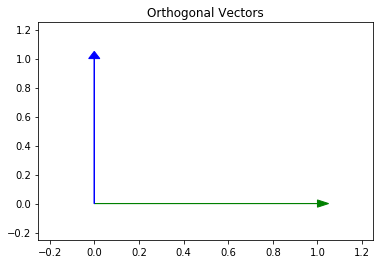

Two vectors that are orthogonal to one another 
 are also called perpendicular vectors


In [83]:
# In order to plot two orthogonal vectors we need matplotlib.pyplot library
import matplotlib.pyplot as plt

# creating the vectors
orth_vec_1 = [1, 0]
orth_vec_2 = [0, 1]

# plotting the vectors for a visual rep.
plt.arrow(0,0, orth_vec_1[0], orth_vec_1[1],head_width=.05, head_length=0.05, color ='g')
plt.arrow(0,0, orth_vec_2[0], orth_vec_2[1],head_width=.05, head_length=0.05, color ='b')
plt.xlim(-.25,1.25)          
plt.ylim(-.25,1.25)
plt.title("Orthogonal Vectors")
plt.show()

print('Two vectors that are orthogonal to one another', '\n', 
      'are also called perpendicular vectors')

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [91]:
# we can find this out two different ways

# First lets utilize the mathematical approach
# If the dot product of two vectors is 0, then they are said to be orthogonal

# Let's import numpy
import numpy as np

# Creating the vectors
vec_a = np.array([-5, 3, 7])
print('Vector a:', vec_a)
print('\n')
vec_b = np.array([6, -8, 2])
print('Vector b:', vec_b)


Vector a: [-5  3  7]


Vector b: [ 6 -8  2]


In [93]:
# Using the dot product from numpy

dot_a_b = np.dot(vec_a, vec_b)
print('Orthogonal if dot product is 0', '\n', dot_a_b)

Orthogonal if dot product is 0 
 -40


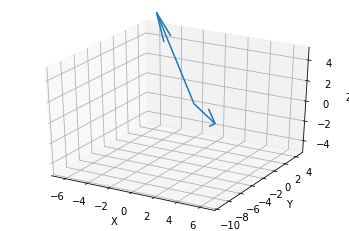



We can see that the vectors are not at right angles 
 to one another on the three dimensional graph


In [103]:
# Graphical rop of non-perpendicular vectors
from mpl_toolkits.mplot3d import Axes3D

vec_a = [-5, 3, 7]
vec_b = [6, -8, 2]

vectors = np.array([[0, 0, 0, -5, 3, 7], 
                    [0, 0, 0, 6, -8, 2]])

Y, X, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(Y, X, Z, U, V, W, length=1)
ax.set_xlim([-7, 7])
ax.set_ylim([-10, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show();
print('\n')
print('We can see that the vectors are not at right angles', '\n', 
      'to one another on the three dimensional graph')

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# Creating the vector

vec_c = np.array([2, -15, 6, 20])


In [162]:
# Computing the Norm (the square root of the sum of the squared elements)
def norm_of_vec(vec):
  norm =[]
  for i in vec:
    norm.extend([(i)**2])
  return round(sum(norm), 4)
print('Vector Norm:', norm_of_vec(vec_c))

Vector Norm: 665


In [163]:
# computing the dot product of the same vector

print('Vector dot product:', np.dot(vec_c, vec_c))

Vector dot product: 665


In [164]:
# computing the matmult of the vector transpose and the vector

vec_c_trans = np.transpose(vec_c)
print('Vector c-Transpose mult Vector c:', np.matmul(vec_c_trans, vec_c))

Vector c-Transpose mult Vector c: 665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

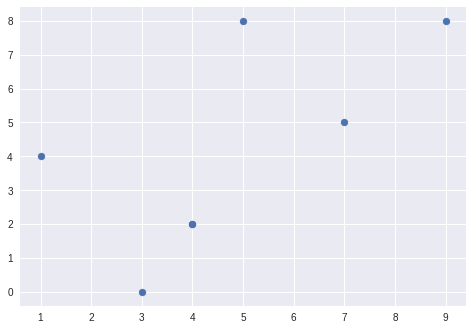

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()